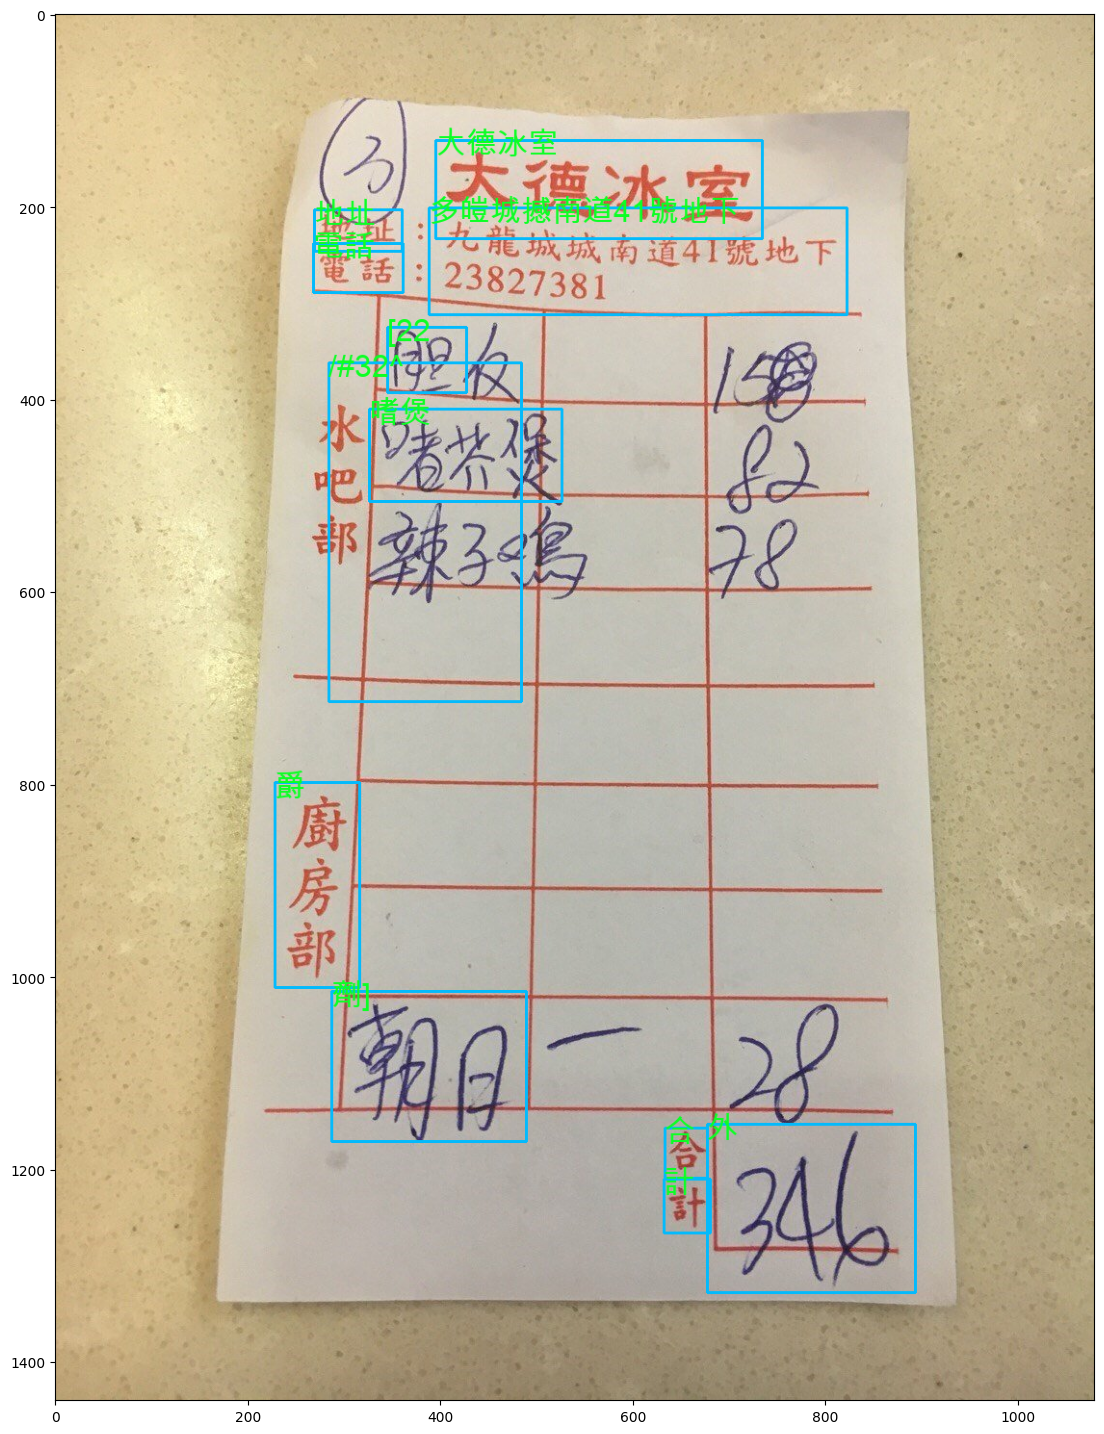

In [1]:
import easyocr
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import matplotlib.pyplot as plt

reader = easyocr.Reader(['ch_tra'])

img = cv2.imread('./website/img/sample.jpg')
result = reader.readtext(img)
color = (252, 186, 3)

font = "Arial Unicode.ttf"
font_text = ImageFont.truetype(font=font, size=32)

for i in result:
    prob = i[-1]
    # if(prob < 0.01):
    #     continue
    img = cv2.rectangle(img, [int(j) for j in i[0][0]], [
                        int(j) for j in i[0][2]], color, 2)

    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((int(i[0][0][0]), int(i[0][0][1]-20)),
              i[1], font=font_text, fill=(36, 255, 12))
    img = np.array(img_pil)

im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (20, 18))
plt.imshow(im_rgb)
plt.show()